In [1]:
import skimage.io
import numpy as np
import skimage.exposure
import matplotlib.pyplot as plt

In [9]:
# example_image = '/media/mha114/Massimal/Vega_Sola/Transects/Otter/Sola_01/20220820_134500_Sola01b/Images/GX020060_01m42s587ms.jpg'
# example_image  = '/media/mha114/Massimal/Vega_Sola/Transects/Otter/Sola_01/20220820_134500_Sola01b/Images/GX020060_06m38s680ms.jpg'
# example_image = '/media/mha114/Massimal/Vega_Sola/Transects/Otter/Sola_01/20220820_134500_Sola01b/Images/GX030060_04m23s467ms.jpg'
#example_image = '/media/mha114/Massimal/Vega_Sola/Transects/Otter/Sola_03/20220821_103936_Sola03a/Images/GX010062_04m03s692ms.jpg'
example_image = '/media/mha114/Massimal/Vega_Sola/Transects/Otter/Sola_03/20220821_103936_Sola03a/Images/GX040062_06m46s967ms.jpg'


In [10]:
image = skimage.io.imread(example_image)

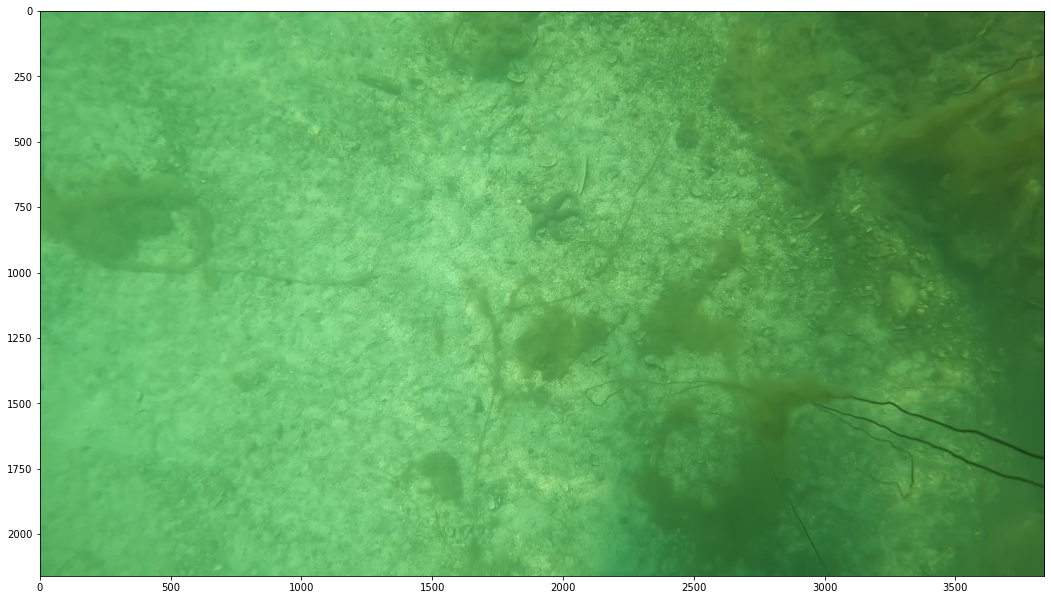

In [11]:
plt.figure(figsize=(18,12))
plt.imshow(image)
plt.show()

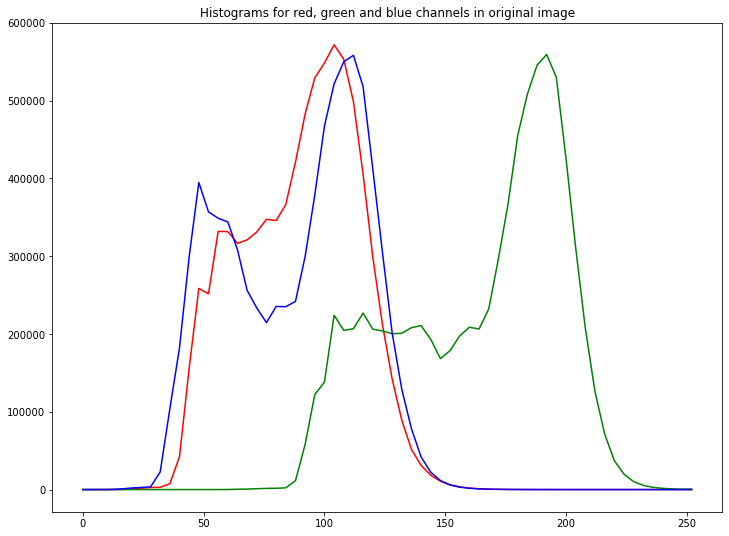

In [12]:
plt.figure(figsize=(12,9))
colors = ['r','g','b']
for i in range(3): 
    h,bin_edges = np.histogram(image[:,:,i],bins=64,range=(0,256))
    plt.plot(bin_edges[:-1],h,colors[i])
plt.title('Histograms for red, green and blue channels in original image')
plt.show()

In [13]:
# Percentile stretch of each band separately
percentiles = (0.5,99)
im_corrected = np.zeros_like(image)

for ii,image_band in enumerate(np.moveaxis(image,2,0)):
    p_low,p_high = np.percentile(image_band, percentiles)
    im_corrected[:,:,ii] = skimage.exposure.rescale_intensity(image_band, in_range=(p_low,p_high))

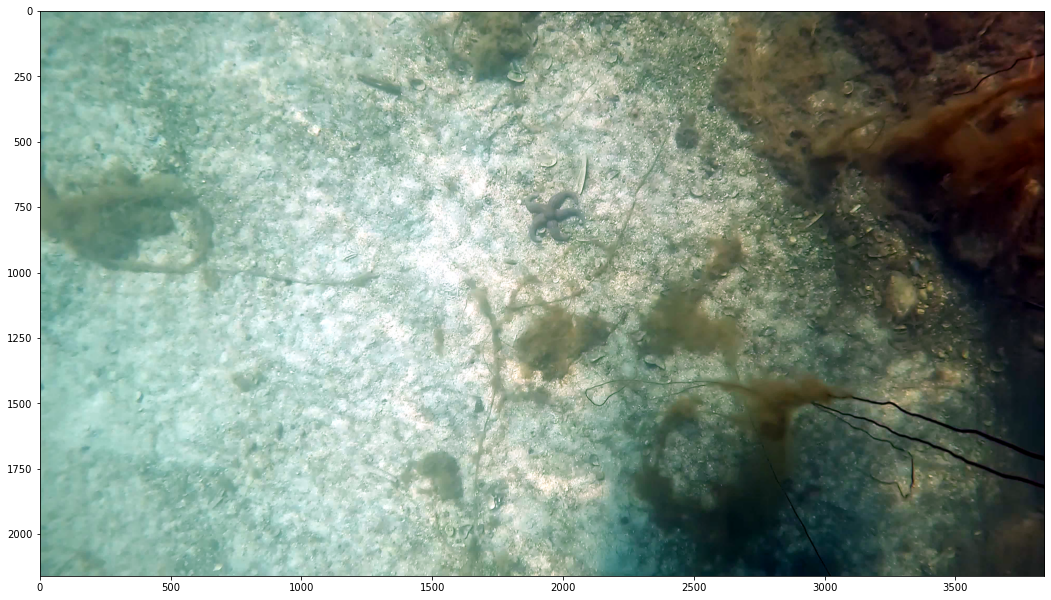

In [14]:
# Show percentile stretched image
plt.figure(figsize=(18,12))
plt.imshow(im_corrected)
plt.show()

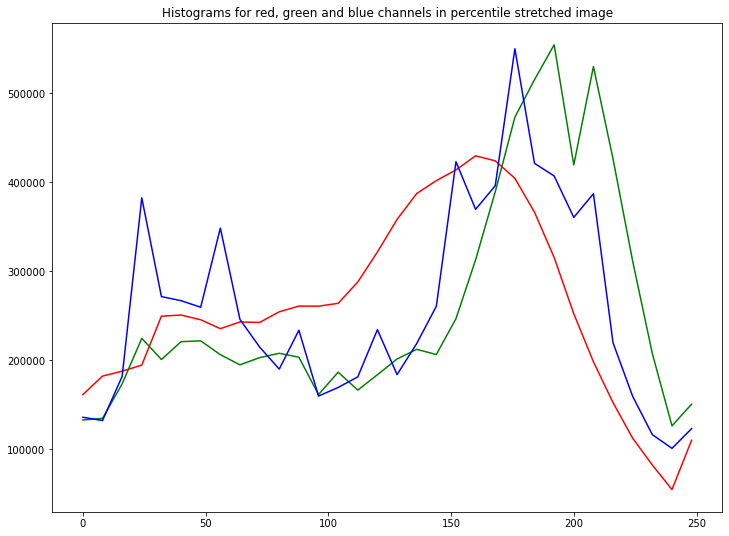

In [15]:
# Shpw histogram for percentile stretched image
plt.figure(figsize=(12,9))
colors = ['r','g','b']
for i in range(3): 
    h,bin_edges = np.histogram(im_corrected[:,:,i],bins=32,range=(0,256))
    plt.plot(bin_edges[:-1],h,colors[i])
plt.title('Histograms for red, green and blue channels in percentile stretched image')
plt.show()